In [1]:
# on importe les librairies importantes
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Résolution Lab 2 - Partie 1

## 1. Définition des fonctions importantes et détermination de la valeur de L

### 1.1 Les différentes matrices de tracé de rayons

In [2]:
def Mlens(f):
    '''
        Retourne la matrice de tracé de rayon pour une lentille 
        mince ayant une longueur focale f
    '''
    M = np.array([[1, 0],
                  [-1/f, 1]])
    return M

def Mtrans(d):
    '''
        Retourne la matrice de tracé de rayon pour une translation
        d'une distance d 
    '''
    M = np.array([[1, d],
                  [0, 1]])
    return M

### 1.2 Fonction pour créer la matrice du système optique 

Voici les 7 étapes du système de caméra: 
1. Translation de $L_{obj}$ ($x$ est notre inconue à trouver)
2. Lentille mince convergente de longueur focale $f_1=150$ mm
3. Translation de $L_2$
4. Lentille divergente de longueur focale $f_2=-75$ mm
5. Translation de $L_3$
6. Lentille mince convergente de longueur focale $f_3=75$ mm
7. Translation de $L_{im}$


In [67]:
def system_matrix(s1, s2, s3, f1=150e-3, f2=-75e-3, f3=75e-3, Lobj=1): # [m]
    '''
        Retourne la matrice de tracé de rayon 2x2 du système de microscopie confocale
        Celle-ci contient l'inconnu 'x' comme variable symbolique
    '''
    #x = sp.symbols('x')
    Mtot = Mtrans(s3)@Mlens(f3)@Mtrans(s2)@Mlens(f2)@Mtrans(s1)@Mlens(f1)@Mtrans(Lobj)
    return Mtot

### 1.3 Test du cas extrême de L

In [68]:
# Pour le cas extrême où L = 100mm, on a que s1 = 0mm. Donc, la lentille f1 est collée à la lentille f2.
s1 = 0 # [m]
L = 100e-3 # [m]
s2 = sp.symbols('s2')
s3 = L-s1-s2
# on trouve la matrice de tracé de rayon pour le plan image en orange
Msys = system_matrix(s1, s2, s3)
# On est dans le cas où le rayon incident et le rayon transmis convergent chancun en un point.
# On est donc dans le cas où le coefficient B de la matrice [[A B], [C,D]] vaut 0.
B = Msys[0, 1] 
# On résoud le système formé de l'élément (0,1) de la matrice de tracé de rayon égal à 0.
s2_solve = sp.solve(B)

print(s2_solve)
# On peut voir que les solutions pour s2 sont soit négatives ou complexes, ce qui sont des résultats
# illogiques voyant que s2 est la distance entre la lentille f2 et la lentille f3. On peut expliquer
# ce résultat par le fait qu'il semble ne pas exister de valeurs possibles pour s2 qui permettent
# d'avoir B=0. Il faut donc augmenter la valeur de L pour permettre d'obtenir des solutions logiques.

[-0.0152173913043478 - 0.063305303385048*I, -0.0152173913043478 + 0.063305303385048*I]


### 1.4 Augmentons la valeur de L pour obtenir des solutions physiques

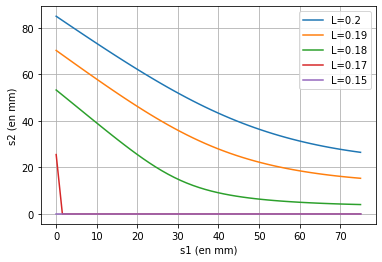

In [71]:
# Augmentons la valeur de L.
L = [200e-3, 190e-3, 180e-3, 170e-3, 150e-3] # [m]
s1 = np.linspace(0, 75e-3, 50) # [m]
s2 = sp.symbols('s2')

for Lval in L:
    slns = []
    for s1_val in s1:
        # On trouve la matrice de tracé de rayon 
        s3 = Lval-s1_val-s2
        Msys = system_matrix(s1_val, s2, s3)
        # On est dans le cas où le rayon incident et le rayon transmis convergent chancun en un point.
        # On est donc dans le cas où le coefficient B de la matrice [[A B], [C,D]] vaut 0.
        B = Msys[0, 1] 
        # print(type(B))
        # print(sp.solve(B)[0])
        slns.append(sp.solve(B)[-1]) # On garde que la solution positive
        # print(slns)
    slns = np.complex_(slns)
    for i in range(len(slns)):
        if  slns[i].imag != 0.0 or slns[i].real<0:
            slns[i] = 0 
    slns = slns.real
    plt.plot(s1*1e3, slns*1e3, label=f'L={Lval}')

plt.legend()
plt.xlabel("s1 (en mm)")
plt.ylabel("s2 (en mm)")
plt.grid()

Allons avec L=190mm, car elle semble être la valeur la plus petite de $L$ qui fait que $s2$ est positif et réel pour les valeurs de $s1$ considérées et des valeurs plus grandes aussi.

# 2. Graphiques

### 2.1 Graphique 1: Grossissement vs position de la lentille L2 .

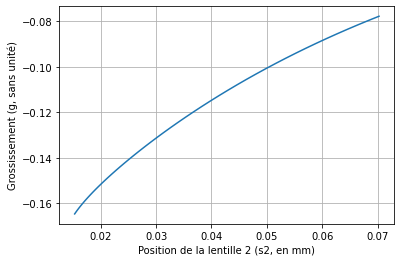

In [76]:
L = 190e-3 # [m]
s1 = np.linspace(0, 75e-3, 50) # [m]
s2 = sp.symbols('s2')
s2_slns = []
g = []
for s1_val in s1:
    # On trouve la matrice de tracé de rayon 
    s3 = L-s1_val-s2
    Msys = system_matrix(s1_val, s2, s3)
    # On est dans le cas où le rayon incident et le rayon transmis convergent chancun en un point.
    # On est donc dans le cas où le coefficient B de la matrice [[A B], [C,D]] vaut 0.
    A = Msys[0, 0]
    B = Msys[0, 1] 
    s2_solve = sp.solve(B)[-1]
    s2_slns.append(s2_solve)
    g.append(A.evalf(subs={'s2':s2_solve})) # On garde que la solution positive

plt.plot(s2_slns, g)
plt.xlabel("Position de la lentille 2 (s2, en mm)")
plt.ylabel("Grossissement (g, sans unité)")
plt.grid()
# Le grossissement est négatif et il est plus petit que 1 en valeur absolue, ce qui 
# est exactement ce qu'on veut 
# Nic -> :)

### 2.2 Graphique 2: Résolution vs position de la lentille L2

De manière générale, la résolution est définie comme la distance minimale pour distinguer deux éléments de n'importe quoi. Ici, la résolution est définie comme la distance minimale entre deux points dans le plan objet qui de manière à ce que ces deux points soient imagés sur deux pixels différents dans le plan image.

Le développement fait précédemment était fait en allant du plan objet au plan image. Si on voulait aller du plan image au plan objet, on pourrait refaire tout le développement ou on peut réaliser que c'est tout simplement le chemin inverse de ce qu'on vient juste de faire. On peut donc facilement déterminer la taille d'un pixel dans le plan objet en divisant la taille d'un pixel, soit $3,6 \mu$ m $\times$  $3,6 \mu m$, par le grossissement trouvé précédemment pour chaque valeur de $s2$. 



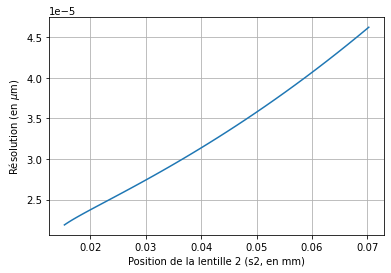

In [77]:
taille_pixel = 3.6e-6
res = []
for element in g:
    # J'ai pris la valeur absolue, car je ne vois pas
    res.append(np.abs(taille_pixel/element)) 
plt.plot(s2_slns, res)
plt.xlabel("Position de la lentille 2 (s2, en mm)")
plt.ylabel("Résolution (en $\mu$m)")
plt.grid()

### 2.3 Graphique 3: Profondeur de champ vs position de la lentille L2

Même chose que pour le pré-lab 1, mais on utilise $d_{pixel}$ au lieu de $d_{steno}$

In [78]:
# Calcul Retourne la position des plans images (orange et rose), qui se retrouvent
# à droite de la lentille à droite
f3 = 150e-3 # [m]  
d=3.6e-6 # [m]
D=25.4e-3 # [m]
s3_orange = f3 - (d*f3)/(D-d) # Position du plan image en orange
s3_rose = f3 + (d*f3)/(D-d) # Position du plan image en rose

# Fonction pour calculer la profondeur de champ (PdC)
def PdC(s1, L, s3_orange, s3_rose):
    # on trouve la matrice de tracé de rayon pour le plan image en orange
    s2 = sp.symbols('s2')
    Msys = system_matrix(s1, s2, s3_orange)
    # On est dans le cas où le rayon incident et le rayon transmis convergent chancun en un point.
    # On est donc dans le cas où le coefficient B de la matrice [[A B], [C,D]] vaut 0.
    B = Msys[0, 1] 
    # On résoud le système formé de l'élément (0,1) de la matrice de tracé de rayon égal à 0.
    x1 = sp.solve(B)[0]

    # On trouve la matrice de tracé de rayon pour le plan image en rose.
    s2 = sp.symbols('s2')
    Msys = system_matrix(f, L, s3_rose)
    # Même chose que pour le plan image en orange.
    B = Msys[0, 1]
    # On résoud le système formé de l'élément (0,1) de la matrice de tracé de rayon égal à 0.
    x2 = sp.solve(B)[0]
    # On calcule la résolution axiale.
    dof = np.abs(x2-x1)
    return dof

In [ ]:
L = 190e-3 # [m]
s1 = np.linspace(0, 75e-3, 50) # [m]
PdC_vals = []
# Calcul de la profondeur de champ pour chaque valeur de s1
for s1_val in s1:
    PdC_vals.append(PdC(f, L, s3_orange, s3_rose))

plt.plot(s2_slns, PdC_vals)
plt.xlabel("Position de la lentille 2 (s2, en mm)")
plt.ylabel("Grossissement (g, sans unité)")
plt.grid()

In [10]:
f = [25e-3,35e-3,45e-3,55e-3,75e-3]  # [m]
pinhole_size = 75.0e-6 # [m]
dofs = []
L = [15e-3,25e-3,35e-3,45e-3] # [m]
every_dofs = []
for i in range(len(f)):
    dofs = []
    for j in range(len(L)):
        # On calculate la résolution axiale
        dof = compute_dof(f[i], L[j], pinhole_size)
        # On ajoute la résolution axiale à une liste contenant les différentes résolutions axiales
        dofs.append(dof)
    # On ajoute les dofs pour une distance d à une liste storant les dofs pour les différents d
    every_dofs.append(dofs)

[0.000266541538029637, 0.000266539921813594, 0.000266538536500951, 0.000266537382084542]


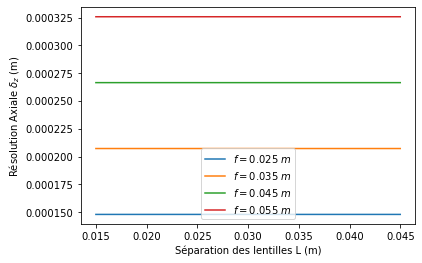

In [11]:
plt.figure()
for i in range(len(L)):
    plt.plot(L, every_dofs[i], label=f'$f = ${f[i]} $m$')
plt.xlabel('Séparation des lentilles L (m)')
plt.ylabel('Résolution Axiale $\delta_z$ (m)')
plt.legend(loc='best')

print(every_dofs[2])